In [2]:
import pandas as pd
import numpy as np


np.random.seed(19)

In [3]:
#train_file_path = r'datasets\Train.csv'

In [4]:
#train = pd.read_csv(train_file_path)

In [5]:
#train.shape

Wow, that's a lot! We will create dummy train and dummy test datasets to play with data, as such huge dataset is troublesome

In [6]:
#sample = train.sample(300000)

In [7]:
#threshold = int(0.8 * sample.shape[0])

In [8]:
#train, test = sample[:threshold], sample[threshold:]

In [9]:
#train.shape

In [10]:
#test.shape

In [11]:
#train.to_hdf('datasets\dummy_train.h5', key='df')
#test.to_hdf('datasets\dummy_test.h5', key='df')

In [12]:
train = pd.read_hdf(r'datasets\dummy_train.h5', key='df')

In [13]:
train.head()

,Id,Title,Body,Tags
2530000,2530001,SQL Filtering based on Calculated Time Slots,<p>Im making a simple booking system for our p...,sql sql-server asp.net-mvc query tsql
1403686,1403687,What sort of errors can lead to session data b...,<p>I'm experiencing a strange error with my ca...,php session cakephp load-balancing
2470612,2470613,Convert nmake makefile into Visual Studio 2005...,<p>We have some old C code here that's built w...,c visual-studio-2005 nmake
309905,309906,HUGE query execution time difference between o...,<p>I'm running the following query:</p>\n\n<pr...,oracle query-optimization data-dictionary
4079679,4079680,Image on start up / loading,"<p>I ma developing an app, which at the moment...",android image loading oncreate


In [14]:
train.shape

(240000, 4)

In [15]:
train = train.drop_duplicates()

In [16]:
train = train.dropna()

In [17]:
train.shape

(239999, 4)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
labels = train.Tags

In [20]:
# labels = labels.map(lambda x: x.split())

In [21]:
count_vectorizer = CountVectorizer(max_features=500, token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
labels_transformed = count_vectorizer.fit_transform(labels.values)

In [22]:
labels.values

array(['sql sql-server asp.net-mvc query tsql',
       'php session cakephp load-balancing', 'c visual-studio-2005 nmake',
       ..., 'php mysql', 'ubuntu sendmail', 'javascript html css object'],
      dtype=object)

In [23]:
labels_transformed = count_vectorizer.fit_transform(labels.values)

In [24]:
labels_transformed.shape

(239999, 500)

In [25]:
labels_transformed.indices

array([394, 395,  35, ..., 199,  98, 309])

In [26]:
labels_transformed

<239999x500 sparse matrix of type '<class 'numpy.int64'>'
	with 428014 stored elements in Compressed Sparse Row format>

In [27]:
features = count_vectorizer.get_feature_names()

In [28]:
count = labels_transformed.sum(axis=0)

In [29]:
count.shape

(1, 500)

In [30]:
count = count.tolist()[0]

In [31]:
mapping = dict(zip(features, count))

In [32]:
mapping = {k:v for k, v in sorted(mapping.items(), key=lambda item: item[1], reverse=True)}

In [33]:
import matplotlib.pyplot as plt

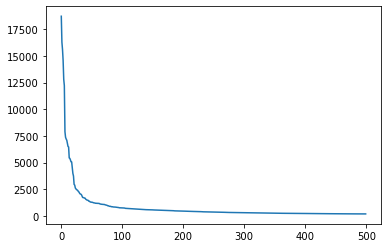

In [34]:
plt.plot(list(mapping.values())[:500])

In [35]:
threshold = 1000

In [36]:
mapping = {k: v for k, v in mapping.items() if v >= threshold}

In [37]:
mapping

{'c#': 18720,
 'java': 16297,
 'php': 15600,
 'javascript': 14571,
 'android': 12809,
 'jquery': 12220,
 'c++': 7902,
 'python': 7375,
 'iphone': 7217,
 'asp.net': 7102,
 'mysql': 6831,
 'html': 6523,
 '.net': 6469,
 'sql': 5441,
 'ios': 5403,
 'objective-c': 5257,
 'linux': 5076,
 'css': 5065,
 'ruby-on-rails': 4558,
 'windows': 3992,
 'c': 3748,
 'sql-server': 2964,
 'ruby': 2898,
 'wpf': 2626,
 'xml': 2539,
 'ajax': 2469,
 'regex': 2441,
 'database': 2394,
 'windows-7': 2291,
 'asp.net-mvc': 2251,
 'xcode': 2135,
 'django': 2068,
 'osx': 2050,
 'arrays': 2000,
 'vb.net': 1871,
 'eclipse': 1744,
 'facebook': 1723,
 'ruby-on-rails-3': 1715,
 'ubuntu': 1683,
 'json': 1675,
 'performance': 1579,
 'string': 1535,
 'networking': 1499,
 'multithreading': 1487,
 'winforms': 1468,
 'visual-studio-2010': 1393,
 'security': 1390,
 'wcf': 1337,
 'bash': 1305,
 'asp.net-mvc-3': 1304,
 'image': 1289,
 'homework': 1287,
 'html5': 1262,
 'web-services': 1238,
 'git': 1230,
 'wordpress': 1219,
 'vis

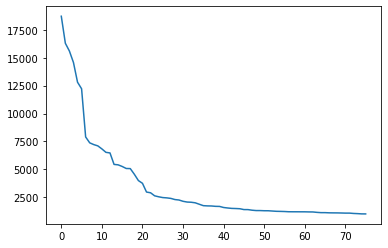

In [38]:
plt.plot(list(mapping.values()))

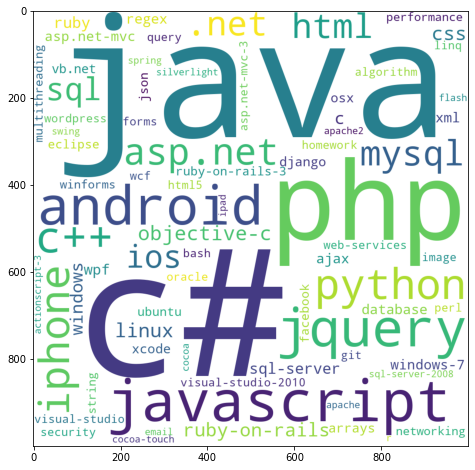

In [39]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mapping)
plt.imshow(wc)

In [40]:
top_20_tags = list(mapping.items())[:20]

In [41]:
top_20_counts = [tag[1] for tag in top_20_tags]
top_20_words = [tag[0] for tag in top_20_tags]

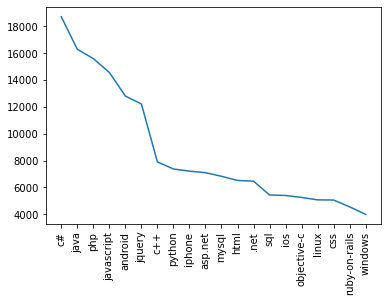

In [42]:
plt.plot(top_20_counts)
plt.xticks(range(20), top_20_words, rotation='vertical')
plt.show()

In [43]:
titles = train.Title.values
bodies = train.Body.values
tags = train.Tags.values

In [44]:
train.head(2)

,Id,Title,Body,Tags
2530000,2530001,SQL Filtering based on Calculated Time Slots,<p>Im making a simple booking system for our p...,sql sql-server asp.net-mvc query tsql
1403686,1403687,What sort of errors can lead to session data b...,<p>I'm experiencing a strange error with my ca...,php session cakephp load-balancing


In [45]:
print(bodies[1])

<p>I'm experiencing a strange error with my cakePHP application. The users to this application occasionally are authenticated incorrectly and are able to view a different user's profile information on their page. I know this is a very open ended question, and without code should be hard to get a specific answer, but I'm wondering what sort of general problems could lead to this sort of behavior, and if anyone on SO could lead me in the right direction. It seems like it should be a common enough problem, but I can't find any literature about it.</p>

<p>My application is behind a load balancer, which might have the potential for weird behavior with the session, but I'm under the impression that this is not the case.</p>



In [56]:
vocab = np.vstack([titles, bodies])
vocab.shape

(2, 239999)

In [62]:
input_data = [' '.join([title, body]) for title, body in zip(titles, bodies)]

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [122]:
VOCAB_SIZE = 2000

tokenizer = Tokenizer(num_words = VOCAB_SIZE)

tokenizer.fit_on_texts(input_data)

In [123]:
input_data_encoded = tokenizer.texts_to_matrix(input_data)

In [124]:
num_tags = 100

count_vectorizer = CountVectorizer(max_features=num_tags, token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
labels_transformed = count_vectorizer.fit_transform(labels.values).toarray()

In [125]:
# # Create the encoder
# from sklearn.preprocessing import MultiLabelBinarizer

# tag_encoder = MultiLabelBinarizer()
# tags_encoded = tag_encoder.fit_transform(tags)

In [126]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow import keras

model = Sequential()
model.add(layers.Dense(512, input_shape=(VOCAB_SIZE,), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_tags, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
              keras.metrics.AUC(name='auc'),
              ])

In [127]:
model.fit(input_data_encoded, labels_transformed, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0684 - precision: 0.1733 - recall: 0.2293 - auc: 0.8729 - val_loss: 0.0293 - val_precision: 0.7814 - val_recall: 0.3236 - val_auc: 0.9534
Epoch 2/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0294 - precision: 0.7231 - recall: 0.3812 - auc: 0.9549 - val_loss: 0.0267 - val_precision: 0.7559 - val_recall: 0.3985 - val_auc: 0.9620
Epoch 3/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0265 - precision: 0.7385 - recall: 0.4307 - auc: 0.9645 - val_loss: 0.0262 - val_precision: 0.7584 - val_recall: 0.3980 - val_auc: 0.9618
Epoch 4/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0244 - precision: 0.7498 - recall: 0.4669 - auc: 0.9710 - val_loss: 0.0260 - val_precision: 0.7558 - val_recall: 0.4158 - val_auc: 0.9608
Epoch 5/20
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0224 - precision: 0.7626 - recall: 0.5077 - auc: 0.9

In [ ]:
model.evaluate(body_test, test_tags, batch_size=128)


In [48]:
tokenizer_titles = Tokenizer()
tokenizer_bodies = Tokenizer()

In [39]:
tokenizer_titles.fit_on_texts(titles.tolist())
tokenizer_bodies.fit_on_texts(bodies.tolist())

In [41]:
titles_encoded = tokenizer_titles.texts_to_sequences(titles)
bodies_encoded = tokenizer_bodies.texts_to_sequences(bodies)

In [42]:
MAX_LEN_titles = 20
MAX_LEN_bodies = 100

In [43]:
titles_padded = pad_sequences(titles_encoded, maxlen=MAX_LEN_bodies)
bodies_padded = pad_sequences(bodies_encoded, maxlen=MAX_LEN_bodies)

In [44]:
from tensorflow.keras import layers
from tensorflow import keras

In [45]:
words_titles = len(tokenizer_titles.word_counts)+1
words_bodies = len(tokenizer_bodies.word_counts)+1

In [46]:
num_tags = 100

In [47]:
MAX_LEN_titles

20

In [48]:
MAX_LEN_bodies

100

In [49]:
count_vectorizer = CountVectorizer(max_features=num_tags, token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
labels_transformed = count_vectorizer.fit_transform(labels.values)

In [307]:
# # title_input = keras.Input(shape=(MAX_LEN_titles))
# # bodies_input = keras.Input(shape=(MAX_LEN_bodies))

# # embedding_titles = layers.Embedding(input_dim=words_titles, output_dim=64)(title_input)
# # embedding_bodies = layers.Embedding(input_dim=words_bodies, output_dim=64)(bodies_input)

# # lstm_titles = layers.LSTM(16)(embedding_titles)
# # lstm_bodies = layers.LSTM(32)(embedding_bodies)

# # concat = layers.concatenate([lstm_titles, lstm_bodies])

# # dense = layers.Dense(256, activation='relu')(concat)
# # drop = layers.Dropout(0.5)(dense)
# # tags = layers.Dense(num_tags, activation='sigmoid')(drop)

# title_input = keras.Input(shape=(MAX_LEN_bodies))
# bodies_input = keras.Input(shape=(MAX_LEN_bodies))

# embedding_titles = layers.Embedding(input_dim=words_titles, output_dim=64)(title_input)
# embedding_bodies = layers.Embedding(input_dim=words_bodies, output_dim=64)(bodies_input)

# cnn_titles = layers.Conv1D(64, kernel_size=7, activation='relu')(embedding_titles)
# cnn_bodies = layers.Conv1D(64, kernel_size=7, activation='relu')(embedding_bodies)

# concat = layers.concatenate([cnn_titles, cnn_bodies], axis=-1)

# cnn = layers.Conv1D(64, kernel_size=7, activation='relu')(concat)

# flatten = layers.Flatten()(cnn)

# dense = layers.Dense(256, activation='relu')(flatten)
# drop = layers.Dropout(0.5)(dense)
# tags = layers.Dense(num_tags, activation='sigmoid')(drop)

In [308]:
# model = keras.Model(
#     inputs=[title_input, bodies_input],
#     outputs=[tags],
# )

In [302]:
labels_vec = labels_transformed.toarray()

In [219]:
import tensorflow_addons as tfa
from tensorflow_addons.metrics.hamming import hamming_loss_fn, HammingLoss
from sklearn.metrics import hamming_loss

In [304]:
labels_vec = labels_vec.astype(np.float32)

In [303]:
labels_vec.shape

(239999, 100)

In [309]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        'binary_crossentropy',
    ],
    metrics = [keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
              keras.metrics.AUC(name='auc'),
              ]
    
)

In [310]:
history = model.fit([titles_padded, bodies_padded], labels_vec, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
6000/6000 [==============================] - 1522s 254ms/step - loss: 0.0486 - precision: 0.6957 - recall: 0.0862 - auc: 0.8489 - val_loss: 0.0402 - val_precision: 0.8069 - val_recall: 0.1636 - val_auc: 0.8994
Epoch 2/2
6000/6000 [==============================] - 1508s 251ms/step - loss: 0.0406 - precision: 0.7902 - recall: 0.1754 - auc: 0.9004 - val_loss: 0.0388 - val_precision: 0.8151 - val_recall: 0.1869 - val_auc: 0.9113


In [311]:
history = model.fit([titles_padded, bodies_padded], labels_vec, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
6000/6000 [==============================] - 1476s 246ms/step - loss: 0.0403 - precision: 0.8005 - recall: 0.1882 - auc: 0.9030 - val_loss: 0.0395 - val_precision: 0.8434 - val_recall: 0.1773 - val_auc: 0.9075
Epoch 2/2
6000/6000 [==============================] - 1478s 246ms/step - loss: 0.0409 - precision: 0.8060 - recall: 0.1842 - auc: 0.9011 - val_loss: 0.0397 - val_precision: 0.8545 - val_recall: 0.1615 - val_auc: 0.9030


In [268]:
# model.save(r'models\simple_lstm_two_inputs')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\simple_lstm_two_inputs\assets


In [242]:
test = pd.read_hdf(r'datasets\dummy_test.h5', key='df')

In [243]:
test.head()

,Id,Title,Body,Tags
1052590,1052591,Is there anyway to use MySQL's LOAD XML LOCAL ...,<p>with this type of XML format?</p>\n\n<pre><...,mysql xml load local infile
4841054,4841055,GPO refresh error - Policy Refresh has not com...,"<p>I'm having problem with my GPO changes, tha...",windows windows-server-2003 active-directory g...
541743,541744,UAC thinks my Application is an installer Part 2,<p>I have been trying to deal with the Windows...,installer windows-server-2003 uac manifest
5006435,5006436,Poor performance when holding down accelerator...,<p>I have bound a menu item to invoke the undo...,java performance swing hotkeys accelerator
4822115,4822116,How do I configure/make/install against an old...,<p>I'm trying to install a piece of software (...,linux osx unix make compilation


In [253]:
count_vectorizer = CountVectorizer(max_features=num_tags, token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+')
labels_transformed = count_vectorizer.fit_transform(labels.values)

In [244]:
y_test = test.Tags

In [254]:
y_test = count_vectorizer.transform(y_test.values)

In [255]:
test_titles = test.Title.values
test_bodies = test.Body.values

In [256]:
test_titles = tokenizer_titles.texts_to_sequences(test_titles)
test_bodies = tokenizer_bodies.texts_to_sequences(test_bodies)

In [257]:
test_titles = pad_sequences(test_titles, maxlen=MAX_LEN_titles)
test_bodies = pad_sequences(test_bodies, maxlen=MAX_LEN_bodies)

In [260]:
y_labels = y_test.toarray()

In [261]:
model.evaluate([test_titles, test_bodies], y_labels)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - precision: 0.8298 - recall: 0.2203 - auc: 0.9225


[0.03526732325553894,
 0.8298198580741882,
 0.22033612430095673,
 0.9225457906723022]

In [263]:
a = model.predict([test_titles[:2], test_bodies[:2]])

In [266]:
a[1].shape

(100,)

In [267]:
a[0].sum()

0.83449024

In [264]:
a

array([[0.00718424, 0.00594637, 0.00959061, 0.00365167, 0.00166285,
        0.00731318, 0.01337482, 0.01384696, 0.00701527, 0.00739616,
        0.00725046, 0.00254973, 0.00133239, 0.00384083, 0.00147757,
        0.02098291, 0.001426  , 0.00111864, 0.00059226, 0.00132645,
        0.01786144, 0.00322755, 0.00223436, 0.00465925, 0.01776487,
        0.00082463, 0.00525453, 0.00674454, 0.00293122, 0.0017031 ,
        0.01039312, 0.00732048, 0.00392562, 0.00202317, 0.00152655,
        0.00771669, 0.0014986 , 0.01010236, 0.00187979, 0.00709753,
        0.0027952 , 0.00086522, 0.00318694, 0.00077387, 0.00369275,
        0.05015795, 0.01822655, 0.00497737, 0.00035632, 0.00563828,
        0.00083686, 0.01528627, 0.00115929, 0.00131075, 0.01842277,
        0.00393211, 0.00447604, 0.00258893, 0.00189547, 0.003303  ,
        0.00819276, 0.00678587, 0.0053345 , 0.15512003, 0.01167346,
        0.00379423, 0.0015087 , 0.00766095, 0.03065283, 0.03697919,
        0.01077668, 0.01413924, 0.00263043, 0.00

In [ ]:
# hl = HammingLoss(mode='multilabel', threshold=0.8)

# def hamming_loss2(y_true, y_pred, mode='multilabel'):
#     if mode not in ['multiclass', 'multilabel']:
#         raise TypeError('mode must be: [None, multilabel])')

#     if mode == 'multiclass':
#         nonzero = tf.cast(tf.math.count_nonzero(y_true * y_pred, axis=-1), tf.float32)
#         return 1.0 - nonzero

#     else:
#         nonzero = tf.cast(tf.math.count_nonzero(y_true - y_pred, axis=-1), 
#             tf.float32)
#         return nonzero / y_true.get_shape()[-1]
    
# # model.compile(
# #     optimizer=keras.optimizers.RMSprop(1e-3),
# #     loss=[
# #         hamming_loss2,
# #     ]
# # )

# hl = HammingLoss(mode='multilabel', threshold=0.8)

# from functools import partial

# phamming = partial(hamming_loss_fn, mode='multilabel', threshold=0.8)

In [108]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)